In [48]:
import pandas as pd
import numpy as np
my_data_frame=pd.read_csv('fake_job_postings.csv')

In [49]:
my_data_frame.head(2)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [50]:
del_columns=['has_company_logo','salary_range','employment_type']
for col in del_columns:
  del my_data_frame[col]

In [51]:
my_data_frame.head(2)

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_questions,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,0,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,0,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [52]:
my_data_frame.fillna('',inplace=True)

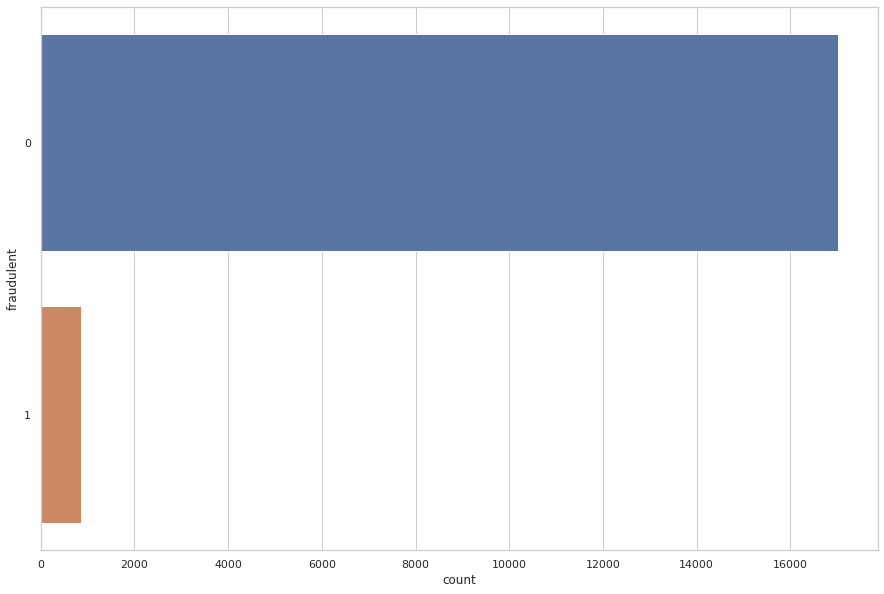

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(y='fraudulent',data=my_data_frame)

In [54]:
job_category=dict(my_data_frame.required_experience.value_counts())
del job_category['']

In [55]:
job_category

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

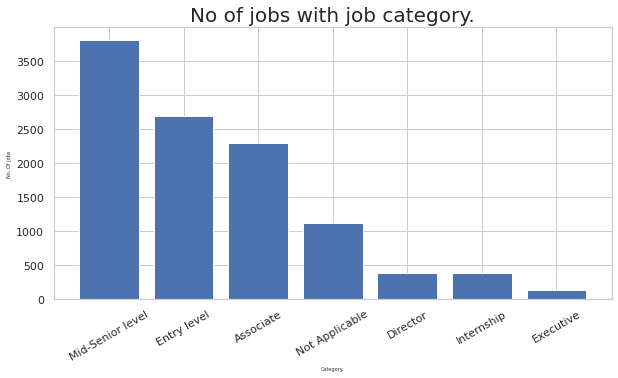

In [56]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(job_category.keys(),job_category.values())
plt.title("No of jobs with job category.",size=20)
plt.xlabel("Category.",size=5)
plt.ylabel("No. Of jobs",size=5)
plt.xticks(rotation=30)
plt.show()

In [57]:
my_data_frame['text']=my_data_frame['title']+' '+my_data_frame['company_profile']+' '+my_data_frame['description']+' '+my_data_frame['requirements']+' '+my_data_frame['benefits']
del my_data_frame['title']
del my_data_frame['company_profile']
del my_data_frame['description']
del my_data_frame['requirements']
del my_data_frame['benefits']
del my_data_frame['location']
del my_data_frame['telecommuting']
del my_data_frame['required_education']
del my_data_frame['required_experience']
del my_data_frame['department']
del my_data_frame['industry']
del my_data_frame['function']
del my_data_frame['has_questions']
my_data_frame['text']

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution  Vend is looki...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer  Nemsia Studios is looking fo...
17879    Web Application Developers Vend is looking for...
Name: text, Length: 17880, dtype: object

In [58]:
my_data_frame.head(1)

,job_id,fraudulent,text
0,1,0,"Marketing Intern We're Food52, and we've creat..."


In [59]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
my_data_frame["clean_text"] = my_data_frame["text"].apply(tokenizer.tokenize)
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
feature_data = my_data_frame["clean_text"]
listOfDFRows = feature_data.to_numpy().tolist()
len(listOfDFRows)

my_data_frame

,job_id,fraudulent,text,clean_text
0,1,0,"Marketing Intern We're Food52, and we've creat...","[Marketing, Intern, We, re, Food52, and, we, v..."
1,2,0,Customer Service - Cloud Video Production 90 S...,"[Customer, Service, Cloud, Video, Production, ..."
2,3,0,Commissioning Machinery Assistant (CMA) Valor ...,"[Commissioning, Machinery, Assistant, CMA, Val..."
3,4,0,Account Executive - Washington DC Our passion ...,"[Account, Executive, Washington, DC, Our, pass..."
4,5,0,Bill Review Manager SpotSource Solutions LLC i...,"[Bill, Review, Manager, SpotSource, Solutions,..."
...,...,...,...,...
17875,17876,0,Account Director - Distribution Vend is looki...,"[Account, Director, Distribution, Vend, is, lo..."
17876,17877,0,Payroll Accountant WebLinc is the e-commerce p...,"[Payroll, Accountant, WebLinc, is, the, e, com..."
17877,17878,0,Project Cost Control Staff Engineer - Cost Con...,"[Project, Cost, Control, Staff, Engineer, Cost..."
17878,17879,0,Graphic Designer Nemsia Studios is looking fo...,"[Graphic, Designer, Nemsia, Studios, is, looki..."


In [63]:
from nltk.corpus import stopwords
lemm_tokens = []
lemms = []
for i in range(len(listOfDFRows)):
    for words in listOfDFRows[i]:
        if words not in stopwords.words('english'):
            lemmas = lemmatizer.lemmatize(words.lower(), pos='v')
            lemms.append(lemmas)
    lemm_tokens.append(lemms)
    lemms = []
a = lemm_tokens
%store a

# my_data_frame.head(2)

,job_id,fraudulent,text,clean_text
0,1,0,"Marketing Intern We're Food52, and we've creat...","[Marketing, Intern, We, re, Food52, and, we, v..."
1,2,0,Customer Service - Cloud Video Production 90 S...,"[Customer, Service, Cloud, Video, Production, ..."


In [64]:
del my_data_frame['job_id']
del my_data_frame['clean_text']
del my_data_frame['text']
my_data_frame = my_data_frame.assign(text=a)
my_data_frame

,fraudulent,text
0,0,"[market, intern, we, food52, create, groundbre..."
1,0,"[customer, service, cloud, video, production, ..."
2,0,"[commission, machinery, assistant, cma, valor,..."
3,0,"[account, executive, washington, dc, our, pass..."
4,0,"[bill, review, manager, spotsource, solutions,..."
...,...,...
17875,0,"[account, director, distribution, vend, look, ..."
17876,0,"[payroll, accountant, weblinc, e, commerce, pl..."
17877,0,"[project, cost, control, staff, engineer, cost..."
17878,0,"[graphic, designer, nemsia, studios, look, exp..."


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(preprocessor=' '.join,max_features=100,lowercase=False)


X=cv.fit_transform(my_data_frame['text'])
df1=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
my_data_frame.drop(['text'],axis=1,inplace=True)
main_df=pd.concat([df1,my_data_frame],axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
main_df.shape

(17880, 101)

In [66]:
X=main_df.iloc[:,:-1]
y=main_df.iloc[:,-1] 

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [68]:
from sklearn.naive_bayes import MultinomialNB
multinominal_NB_model = MultinomialNB()
multinominal_NB_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = multinominal_NB_model.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.9504101416853095


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5121
           1       0.00      0.00      0.00       243

    accuracy                           0.95      5364
   macro avg       0.48      0.50      0.49      5364
weighted avg       0.91      0.95      0.93      5364



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log = log_model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))

Accuracy: 0.9625279642058165


In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5121
           1       0.79      0.23      0.36       243

    accuracy                           0.96      5364
   macro avg       0.88      0.62      0.67      5364
weighted avg       0.96      0.96      0.95      5364



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dsct = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dsct.fit(X_train, y_train)
y_pred_dsct = dsct.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dsct))

Accuracy: 0.95917225950783


In [ ]:
print(classification_report(y_test,y_pred_dsct))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5126
           1       0.84      0.20      0.33       238

    accuracy                           0.96      5364
   macro avg       0.90      0.60      0.65      5364
weighted avg       0.96      0.96      0.95      5364



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_efc = rfc.predict(X_test)
print(format(metrics.accuracy_score(y_test, y_pred_efc)))


0.9744593586875466


In [ ]:
print(classification_report(y_test,y_pred_efc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5121
           1       0.99      0.44      0.61       243

    accuracy                           0.97      5364
   macro avg       0.98      0.72      0.80      5364
weighted avg       0.97      0.97      0.97      5364



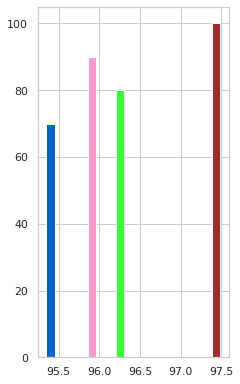

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [3.50, 5.50]
plt.rcParams["figure.autolayout"] = True

x = [95.40,96.25,95.91,97.44]
y = [70,80,90,100]

width = 0.10
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center',color = ['#0066CC', '#33FF33', '#FF99CC', 'brown'])


plt.show()